In [1]:
#import libraries

import pandas as pd
import numpy as np

df = pd.read_csv('agg_station_data.csv')
print(df.info())
print(df['STATION'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203841 entries, 0 to 203840
Data columns (total 10 columns):
STATION              203841 non-null object
DATE                 203841 non-null object
ENTRIES              203841 non-null int64
ID                   203841 non-null object
NEW_ID               203841 non-null float64
DATE_TIME            203841 non-null object
WEEKDAY              203841 non-null object
ENTRY_COUNT          203841 non-null float64
Station_Latitude     203841 non-null float64
Station_Longitude    203841 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 15.6+ MB
None
World Trade Center                    10190
34th St                                7889
Fulton St                              4006
86th St                                3215
23rd St                                3083
                                      ...  
Cypress Hills                           123
238th St-Nereid Av                      123
Morris Park               

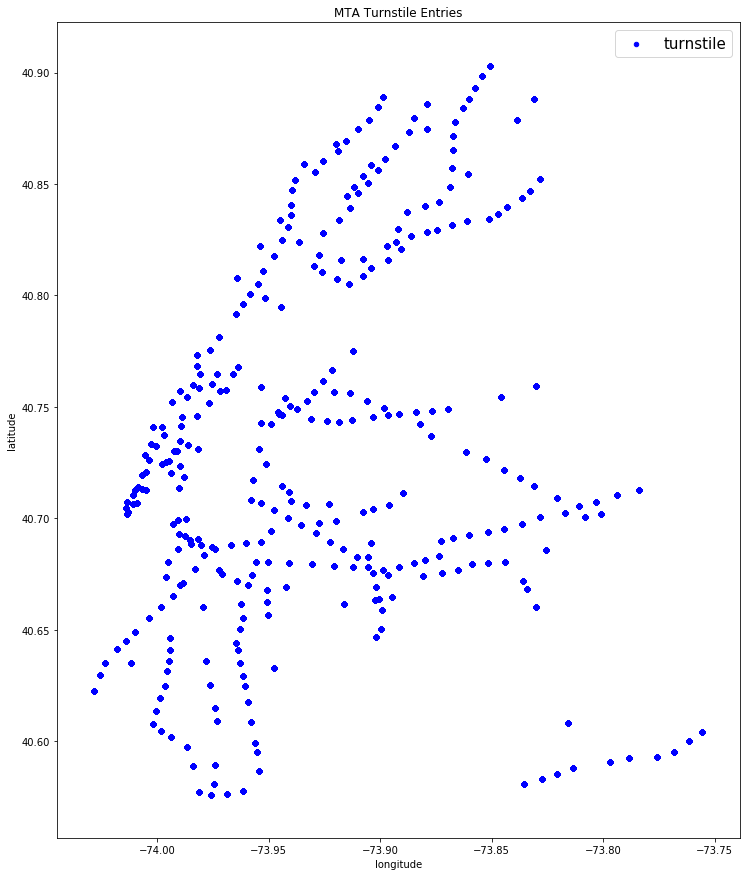

In [2]:
#geo plot station locations: each marker is plotted per Station_Longitude and Station_Latitude 
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon 
%matplotlib inline

geometry = [Point(xy) for xy in zip(df["Station_Longitude"],df["Station_Latitude"])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.head(20)


street_map = gpd.read_file('agg_station_data.csv')

fig, ax = plt.subplots(figsize =(15,15))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df[geo_df['STATION']!='NaN'].plot(ax=ax, markersize = 20, color="blue", marker = "o", label = "turnstile")
plt.title('MTA Turnstile Entries')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(prop={'size':15})

In [3]:
#function to create new geo dataframe for geo plot of sum(ENTRY_COUNT)
#NOTE: have to divide ENTRY_COUNT by standard number (e.g., 10) to normalize circle sizes--otherwise too large to see differences
def process_dataframes(df_geo):
    df_geo = df.dropna()
    agg_entries = geo_df.groupby(['STATION', 'Station_Latitude', 'Station_Longitude'])['ENTRY_COUNT'].sum().reset_index()
    return agg_entries
mta_turnstile_entries = process_dataframes(geo_df)
mta_turnstile_entries['ENTRY_COUNT'] = mta_turnstile_entries['ENTRY_COUNT']/10
mta_turnstile_entries.head()

,STATION,Station_Latitude,Station_Longitude,ENTRY_COUNT
0,103rd St,40.796092,-73.961454,30470.0
1,104th St-102nd St,40.695178,-73.844330,2774.5
2,110th St,40.795020,-73.944250,6685.3
3,110th St-Central Park North,40.799075,-73.951822,5606.2
4,111th St,40.697418,-73.836345,8571.9


In [4]:
#function to create folium circle markers, to be overlaid onto map 
def add_markers_folium_map(df, m, color): 
    for i in range(0,len(df)):
        folium.Circle(location=[df['Station_Latitude'][i], df['Station_Longitude'][i]], popup='Turnstile Entries: '+df['STATION'][i]+ ' #ENTRY_COUNT = %i' %int(df['ENTRY_COUNT'][i]*10), radius=float(df['ENTRY_COUNT'][i])*0.007, color = color, fill = True, fill_color = color).add_to(m)
    return m

In [5]:
import folium
from folium import plugins


In [6]:
#plot folium map & the circle markers for MTA Stations (red)
#larger radius is proportional to higher ENTRY_COUNT 
mta_turnstile_entries.describe()
m = folium.Map(width=1000,height=1000, zoom_start=12,location=[np.mean(mta_turnstile_entries['Station_Latitude']), np.mean(mta_turnstile_entries['Station_Longitude'])])

add_markers_folium_map(mta_turnstile_entries, m, 'red')



In [7]:
schools = {'NYU': {'Station_Latitude': 40.695228, 'Station_Longitude': -73.986698, 'Number_of_Students': 5331}, 'CUNY': {'Station_Latitude':40.695364, 'Station_Longitude': -73.987545, 'Number_of_Students': 17269}}
df_schools = pd.DataFrame(data=schools)
#New York Tech Schools

In [8]:
transposed_df_schools = df_schools.transpose()
transposed_df_schools['School'] = transposed_df_schools.index
transposed_df_schools

,Station_Latitude,Station_Longitude,Number_of_Students,School
NYU,40.695228,-73.986698,5331.0,NYU
CUNY,40.695364,-73.987545,17269.0,CUNY


In [9]:
tech_companies = {'IBM': {'Station_Latitude': 40.762346, 'Station_Longitude': -73.972951, 'Sqft': 1007420}, 'Etsy': {'Station_Latitude': 40.700818, 'Station_Longitude': -73.988167, 'Sqft': 164115},  'Jet.Com': {'Station_Latitude': 40.738834, 'Station_Longitude': -74.027751, 'Sqft': 512000}, 'Seamless': {'Station_Latitude': 40.754182, 'Station_Longitude': -73.985301, 'Sqft': 585000}, 'Foursquare': {'Station_Latitude': 40.742401, 'Station_Longitude': -73.991695, 'Sqft': 339849},  'Yext': {'Station_Latitude': 40.741325, 'Station_Longitude': -73.987477, 'Sqft': 58194}, 'Amazon': {'Station_Latitude': 40.753514, 'Station_Longitude': -73.998919, 'Sqft': 1335040}, 'Google': {'Station_Latitude': 40.741623, 'Station_Longitude': -74.003355, 'Sqft': 2900000}, 'Flatiron Health': {'Station_Latitude': 40.725873, 'Station_Longitude': -74.004721, 'Sqft': 313379}, 'INSPR': {'Station_Latitude': 40.746296, 'Station_Longitude': -73.983942, 'Sqft': 12837}, 'Veritonic': {'Station_Latitude': 40.752577, 'Station_Longitude': -73.980661, 'Sqft': 83247}, 'Company': {'Station_Latitude': 40.753834, 'Station_Longitude': -73.978093, 'Sqft': 1100000}, 'Newsela': {'Station_Latitude': 40.756292, 'Station_Longitude': -73.990192, 'Sqft': 79000}, 'Red Antler': {'Station_Latitude': 40.704129, 'Station_Longitude': -73.986681, 'Sqft': 41400}, 'Huge': {'Station_Latitude': 40.703063, 'Station_Longitude': -73.990534, 'Sqft': 4750000}}
df_tech_companies = pd.DataFrame(data=tech_companies)
#New York Tech Companies
#Forbes: https://www.forbes.com/sites/valleyvoices/2019/03/27/how-new-york-tech-grew-up-and-moved-uptown/#6c66cb1941bf
#Forbes: https://www.forbes.com/sites/heathersenison/2019/02/06/its-official-new-york-city-outranks-san-francisco-as-worlds-top-tech-city/#4126afba7941

In [10]:
transposed_df_tech_companies = df_tech_companies.transpose()
transposed_df_tech_companies['TechCompanies'] = transposed_df_tech_companies.index
transposed_df_tech_companies

,Station_Latitude,Station_Longitude,Sqft,TechCompanies
IBM,40.762346,-73.972951,1007420.0,IBM
Etsy,40.700818,-73.988167,164115.0,Etsy
Jet.Com,40.738834,-74.027751,512000.0,Jet.Com
Seamless,40.754182,-73.985301,585000.0,Seamless
Foursquare,40.742401,-73.991695,339849.0,Foursquare
Yext,40.741325,-73.987477,58194.0,Yext
Amazon,40.753514,-73.998919,1335040.0,Amazon
Google,40.741623,-74.003355,2900000.0,Google
Flatiron Health,40.725873,-74.004721,313379.0,Flatiron Health
INSPR,40.746296,-73.983942,12837.0,INSPR


In [11]:
#Add circle markers for tech schools to map (blue)
#larger radius is proportional to higher number of students 
geometry_schools = [Point(xy) for xy in zip(transposed_df_schools["Station_Longitude"],transposed_df_schools["Station_Latitude"])]

geo_df_schools = gpd.GeoDataFrame(transposed_df_schools, geometry=geometry_schools)
geo_df_schools




def add_markers_folium_map(transposed_df_schools, m, color): 
    for i in range(0,len(transposed_df_schools)):
        folium.Circle(location=[transposed_df_schools['Station_Latitude'][i], transposed_df_schools['Station_Longitude'][i]], popup='Number_of_Students: '+transposed_df_schools['School'][i]+ ' #Number_of_Students = %i' %transposed_df_schools['Number_of_Students'][i], radius=float(transposed_df_schools['Number_of_Students'][i])*0.003, color = color, fill = True, fill_color = color).add_to(m)
    return m

add_markers_folium_map(transposed_df_schools, m, 'blue')

In [12]:
#Add circle markers for tech companies to map (black)
#larger radius is proportional to higher building square footage 
geometry_tech_companies = [Point(xy) for xy in zip(transposed_df_tech_companies["Station_Longitude"],transposed_df_tech_companies["Station_Latitude"])]

geo_df_tech_companies = gpd.GeoDataFrame(transposed_df_tech_companies, geometry=geometry_tech_companies)
geo_df_tech_companies


transposed_df_tech_companies['Sqft'] = transposed_df_tech_companies['Sqft']/100

def add_markers_folium_map(transposed_df_tech_companies, m, color): 
    for i in range(0,len(transposed_df_tech_companies)):
        folium.Circle(location=[transposed_df_tech_companies['Station_Latitude'][i], transposed_df_tech_companies['Station_Longitude'][i]], popup='TechCompany: '+transposed_df_tech_companies['TechCompanies'][i]+ ' #Sqft = %i' %int(transposed_df_tech_companies['Sqft'][i]*100), radius=float(transposed_df_tech_companies['Sqft'][i])*0.003, color = color, fill = True, fill_color = color).add_to(m)
    return m

add_markers_folium_map(transposed_df_tech_companies, m, 'black')